In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD

import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
class BasicNN(nn.Module):
    def __init__(self):
        super().__init__()

        # Input to Hidden Layer 1 (Weights & Biases)
        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False)
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False)

        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad=False)

        # Final Output Bias
        self.final_bias = nn.Parameter(torch.tensor(-16.0), requires_grad=False)

    def forward(self, input):
        # First pathway (top)
        input_to_top_relu = input * self.w00 + self.b00
        top_relu_output = F.relu(input_to_top_relu)
        scaled_top_relu_output = top_relu_output * self.w01

        # Second pathway (bottom)
        input_to_bottom_relu = input * self.w10 + self.b10
        bottom_relu_output = F.relu(input_to_bottom_relu)
        scaled_bottom_relu_output = bottom_relu_output * self.w11

        # Final layer (combine both paths)
        input_to_final_relu = scaled_top_relu_output + scaled_bottom_relu_output + self.final_bias
        output = F.relu(input_to_final_relu)

        return output




In [4]:
input_dose = torch.linspace(start=0, end=1, steps=11)
input_dose

tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000])

In [5]:
model = BasicNN()
output_values= model(input_dose)

In [6]:
sns.set(style='whitegrid')

<Axes: xlabel='None', ylabel='None'>

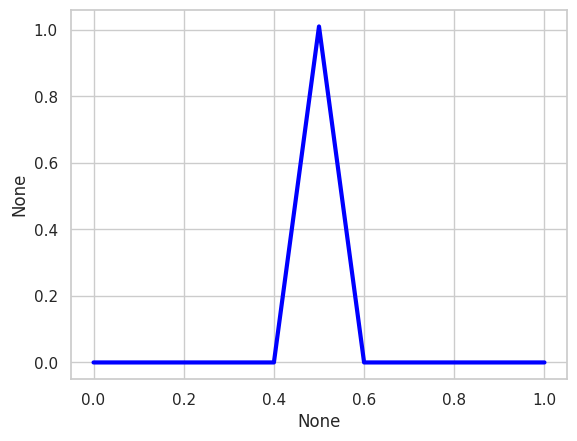

In [7]:
sns.lineplot(x=input_dose,
             y=output_values,
             color='blue',
             linewidth=3)

In [8]:
class BasicNN_train(nn.Module):
    def __init__(self):
        super().__init__()

        # Input to Hidden Layer 1 (Weights & Biases)
        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False)
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False)

        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad=False)

        # Final Output Bias
        self.final_bias = nn.Parameter(torch.tensor(0.0), requires_grad=True)

    def forward(self, input):
        # First pathway (top)
        input_to_top_relu = input * self.w00 + self.b00
        top_relu_output = F.relu(input_to_top_relu)
        scaled_top_relu_output = top_relu_output * self.w01

        # Second pathway (bottom)
        input_to_bottom_relu = input * self.w10 + self.b10
        bottom_relu_output = F.relu(input_to_bottom_relu)
        scaled_bottom_relu_output = bottom_relu_output * self.w11

        # Final layer (combine both paths)
        input_to_final_relu = scaled_top_relu_output + scaled_bottom_relu_output + self.final_bias
        output = F.relu(input_to_final_relu)

        return output




In [31]:
model = BasicNN_train()
output_values= model(input_dose)

In [10]:
sns.set(style='whitegrid')

<Axes: xlabel='None', ylabel='None'>

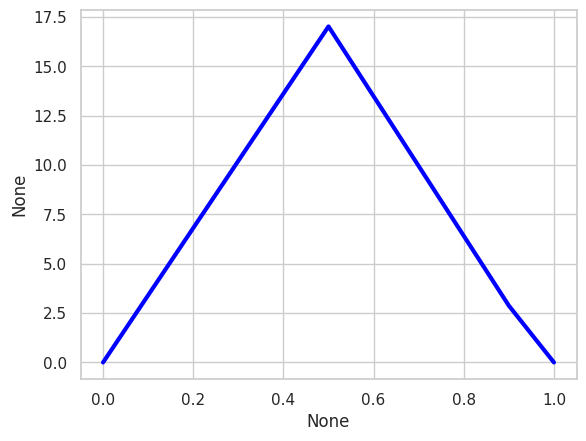

In [24]:
sns.lineplot(x=input_dose,
             y=output_values.detach(),
             color='blue',
             linewidth=3)

In [32]:
# Dummy data
inputs = torch.tensor([0, 0.5, 1])
labels = torch.tensor([0, 1, 0])

optimizer = SGD(model.parameters(), lr=0.1)

print("Final bias, before optimization: " + str(model.final_bias.data.item()) + "\n")

# Training loop
for epoch in range(100):
    total_loss = 0

    for iteration in range(len(inputs)):
        input_i = inputs[iteration]
        label_i = labels[iteration]

        output_i = model(input_i)
        loss = (output_i - label_i) ** 2

        loss.backward()  # calculate gradients
        total_loss += float(loss)

    print(f"Step: {epoch}, Total Epoch Loss: {total_loss}")

    if total_loss < 0.0001:
        print("Num steps: " + str(epoch))
        break

    optimizer.step()       # update parameter using gradients
    optimizer.zero_grad()  # clear gradients for next epoch

    print("Step: " + str(epoch) + " Final Bias: " + str(model.final_bias.data.item()) + "\n")

print("Final bias, after optimization: " + str(model.final_bias.data.item()))

Final bias, before optimization: 0.0

Step: 0, Total Epoch Loss: 256.3200988769531
Step: 0 Final Bias: -3.202000141143799

Step: 1, Total Epoch Loss: 164.0448760986328
Step: 1 Final Bias: -5.7636003494262695

Step: 2, Total Epoch Loss: 104.98870849609375
Step: 2 Final Bias: -7.812880516052246

Step: 3, Total Epoch Loss: 67.1927719116211
Step: 3 Final Bias: -9.45230484008789

Step: 4, Total Epoch Loss: 43.00336837768555
Step: 4 Final Bias: -10.763843536376953

Step: 5, Total Epoch Loss: 27.522159576416016
Step: 5 Final Bias: -11.813075065612793

Step: 6, Total Epoch Loss: 17.614181518554688
Step: 6 Final Bias: -12.652460098266602

Step: 7, Total Epoch Loss: 11.273076057434082
Step: 7 Final Bias: -13.323967933654785

Step: 8, Total Epoch Loss: 7.21476936340332
Step: 8 Final Bias: -13.861174583435059

Step: 9, Total Epoch Loss: 4.6174516677856445
Step: 9 Final Bias: -14.290939331054688

Step: 10, Total Epoch Loss: 2.9551703929901123
Step: 10 Final Bias: -14.634751319885254

Step: 11, Tota

In [34]:
output_values= model(input_dose)

<Axes: xlabel='None', ylabel='None'>

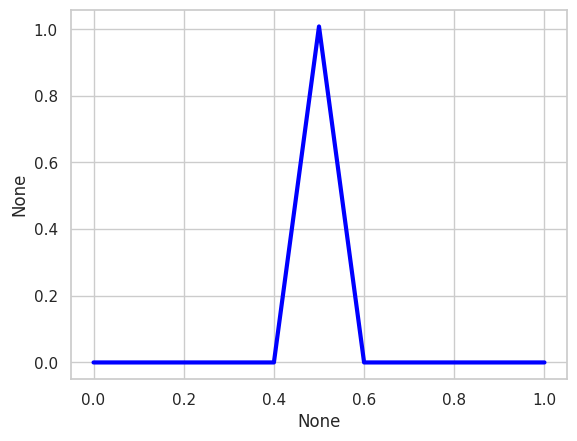

In [35]:
sns.lineplot(x=input_dose,
             y=output_values.detach(),
             color='blue',
             linewidth=3)